In [40]:
import pandas as pd
import numpy as np
import re
import dateparser
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import matplotlib.pyplot as plt

In [41]:
def read_file(file):
    x = open(file,'r', encoding = 'utf-8')
    y = x.read()
    content = y.splitlines()
    return content

In [42]:
# the text file is just a WhatsApp chat log import
chat = read_file('Chat2.txt')
chat[1]

'09/07/2021, 20:39 - Mathieu: Hello there'

In [43]:
chat = [line.strip() for line in chat]
msgs = []
pos = 0
for line in chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)
len(msgs)

346

In [44]:
# I don't think I'm going to do anything with this
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time]

In [45]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
len(date)
name = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]
len(name)
content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')
len(content)

346

In [46]:
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Sender', 'Content'])
df.head(2)

,Date,Time,Sender,Content
0,09/07/2021,20:39,Messages and calls are end,Missing Text
1,09/07/2021,20:39,Mathieu,Hello there


In [47]:
# drop that first line and I guess anything else that would have missing text for whatever reason
df = df[df["Content"]!='Missing Text']
df.reset_index(inplace=True, drop=True)
df.head(1)

,Date,Time,Sender,Content
0,09/07/2021,20:39,Mathieu,Hello there


In [48]:
# it took me so long to figure out that there was a leading space, and I don't know why
df.drop(df[df['Content'] == ' <Media omitted>'].index, inplace=True)

In [49]:
df['Content'].head()

0                     Hello there
1                           oh hi
2     Hope you had a good flight 
3        Well aren’t you up early
4                            Why?
Name: Content, dtype: object

In [50]:
received = df[df['Sender'] == ' Mathieu']
received['Content'].head(2)

0                  Hello there
3     Well aren’t you up early
Name: Content, dtype: object

In [51]:
text = received['Content'].values 
text[0]

' Hello there'

In [52]:
text_string = ""

for item in text:
    text_string += " " + item.lower()

In [53]:
text_string = text_string.split(" ")

In [54]:
clean_text_string = ""

other_common_words = ["did", "got", "bit", "like", "ago", "does", "just", "let", "to", "knows"]

for word in text_string:
    if len(word) > 1 and word.isalnum() and word not in ENGLISH_STOP_WORDS and word not in other_common_words:
        clean_text_string += " " + word.lower().translate(str.maketrans('', '', string.punctuation))
    
clean_text_string.lstrip()

'hello early thank xx oh wow ok hahaha nice brittany lovely yup yup hey colette doing weekend flying friday gonna ask want hahahahahahahh fun say parents french aristocracy need wear dress pearl necklace mean send nudes lol mean send nudes lol hahaha send face ok hahaha lol hey exhibitionist pick lol drive porsche convincing exhibitionist pick lol drive porsche convincing mean nvm haha car car sounds good lol abouts live know roughly pick oh close ok creampies creampies makes hotter lol cover plan lol honest breeding risk kink honest breeding risk kink hot driving convertible warm weather complain driving convertible warm weather complain oh sad sex sex mean nicer lol ahaha pragmatic sleep guy sleep guy kinda hot ngl honest fuck fuck months mean haha good wanted try want feed plan having sex want feed plan having sex ok feed right cum lol ok feed right cum lol sweetie stick tongue kinda vibe xx send nude send stick tongue kinda vibe xx send nude send hmmm breeding material breeding mat

In [55]:
words_list = clean_text_string.split(" ")
words_list.sort()

words_list # still don't get why there's an empty string in there

['',
 '11pm',
 'abouts',
 'ah',
 'ahaha',
 'ahahah',
 'ahahahahahhaha',
 'amazing',
 'appreciate',
 'aristocracy',
 'arrived',
 'ask',
 'bad',
 'believe',
 'best',
 'better',
 'blue',
 'break',
 'break',
 'breeding',
 'breeding',
 'breeding',
 'breeding',
 'brittany',
 'buggs',
 'bunny',
 'car',
 'car',
 'castle',
 'catfish',
 'chance',
 'check',
 'cheeks',
 'close',
 'clothes',
 'clue',
 'cold',
 'colette',
 'complain',
 'complain',
 'confirm',
 'convertible',
 'convertible',
 'convincing',
 'convincing',
 'cover',
 'creampies',
 'creampies',
 'critique',
 'cum',
 'cum',
 'current',
 'dam',
 'dark',
 'day',
 'dear',
 'distracted',
 'doing',
 'doing',
 'doing',
 'dress',
 'drive',
 'drive',
 'drive',
 'driving',
 'driving',
 'dry',
 'dtf',
 'dull',
 'dunno',
 'dunstable',
 'early',
 'elephant',
 'enjoy',
 'exhibitionist',
 'exhibitionist',
 'extremely',
 'face',
 'fair',
 'feed',
 'feed',
 'feed',
 'feed',
 'feel',
 'fetish',
 'fetishes',
 'flying',
 'fold',
 'forehead',
 'forgot',
 'f

In [56]:
frequency = Counter(words_list).most_common()
frequency

[('lol', 13),
 ('send', 9),
 ('good', 7),
 ('hey', 6),
 ('ok', 6),
 ('mean', 5),
 ('right', 5),
 ('want', 5),
 ('breeding', 4),
 ('feed', 4),
 ('hahaha', 4),
 ('sex', 4),
 ('xx', 4),
 ('doing', 3),
 ('drive', 3),
 ('guy', 3),
 ('haha', 3),
 ('honest', 3),
 ('hot', 3),
 ('kinda', 3),
 ('oh', 3),
 ('pick', 3),
 ('plan', 3),
 ('sure', 3),
 ('vibe', 3),
 ('yup', 3),
 ('break', 2),
 ('car', 2),
 ('complain', 2),
 ('convertible', 2),
 ('convincing', 2),
 ('creampies', 2),
 ('cum', 2),
 ('driving', 2),
 ('exhibitionist', 2),
 ('free', 2),
 ('friday', 2),
 ('fuck', 2),
 ('gonna', 2),
 ('having', 2),
 ('humour', 2),
 ('kink', 2),
 ('know', 2),
 ('living', 2),
 ('match', 2),
 ('material', 2),
 ('morning', 2),
 ('necklace', 2),
 ('need', 2),
 ('nice', 2),
 ('nude', 2),
 ('nudes', 2),
 ('office', 2),
 ('photos', 2),
 ('porsche', 2),
 ('question', 2),
 ('risk', 2),
 ('sad', 2),
 ('share', 2),
 ('sleep', 2),
 ('stick', 2),
 ('think', 2),
 ('tongue', 2),
 ('tryna', 2),
 ('wanna', 2),
 ('warm', 2),
 (

# Word Cloud of Top Terms

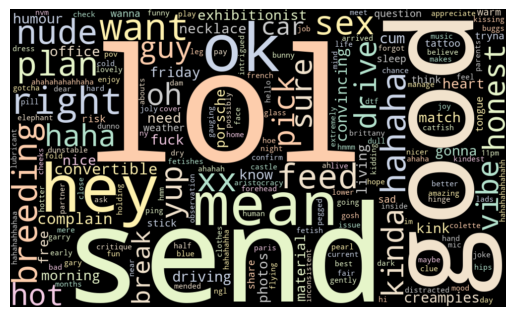

<Figure size 1000x1000 with 0 Axes>

In [59]:
wordcloud = WordCloud(width=1000, height=600, collocations=False, colormap='Pastel2').generate(words_string)
wordcloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

In [57]:
words_string = " ".join(words_list)
words_string.lstrip()

'11pm abouts ah ahaha ahahah ahahahahahhaha amazing appreciate aristocracy arrived ask bad believe best better blue break break breeding breeding breeding breeding brittany buggs bunny car car castle catfish chance check cheeks close clothes clue cold colette complain complain confirm convertible convertible convincing convincing cover creampies creampies critique cum cum current dam dark day dear distracted doing doing doing dress drive drive drive driving driving dry dtf dull dunno dunstable early elephant enjoy exhibitionist exhibitionist extremely face fair feed feed feed feed feel fetish fetishes flying fold forehead forgot free free french friday friday fuck fuck fun funny garry gary gauging gently glass going gonna gonna good good good good good good good gosh gotcha guy guy guy haha haha haha hahaha hahaha hahaha hahaha hahahahahahahh hahahahha hahahahhahaa half hand hard having having heart hearts hello hey hey hey hey hey hey hi hinge hips hmm hmmm hoe holding home honest hon

In [63]:
for word in words_list:
    # I don't know why I had to do this multiple times
    if len(word) < 1:
        words_list.remove(word)
        
words_list

['11pm',
 'abouts',
 'ah',
 'ahaha',
 'ahahah',
 'ahahahahahhaha',
 'amazing',
 'appreciate',
 'aristocracy',
 'arrived',
 'ask',
 'bad',
 'believe',
 'best',
 'better',
 'blue',
 'break',
 'break',
 'breeding',
 'breeding',
 'breeding',
 'breeding',
 'brittany',
 'buggs',
 'bunny',
 'car',
 'car',
 'castle',
 'catfish',
 'chance',
 'check',
 'cheeks',
 'close',
 'clothes',
 'clue',
 'cold',
 'colette',
 'complain',
 'complain',
 'confirm',
 'convertible',
 'convertible',
 'convincing',
 'convincing',
 'cover',
 'creampies',
 'creampies',
 'critique',
 'cum',
 'cum',
 'current',
 'dam',
 'dark',
 'day',
 'dear',
 'distracted',
 'doing',
 'doing',
 'doing',
 'dress',
 'drive',
 'drive',
 'drive',
 'driving',
 'driving',
 'dry',
 'dtf',
 'dull',
 'dunno',
 'dunstable',
 'early',
 'elephant',
 'enjoy',
 'exhibitionist',
 'exhibitionist',
 'extremely',
 'face',
 'fair',
 'feed',
 'feed',
 'feed',
 'feed',
 'feel',
 'fetish',
 'fetishes',
 'flying',
 'fold',
 'forehead',
 'forgot',
 'free',

In [83]:
counted_list = Counter(words_list)
counted_list

Counter({'11pm': 1,
         'abouts': 1,
         'ah': 1,
         'ahaha': 1,
         'ahahah': 1,
         'ahahahahahhaha': 1,
         'amazing': 1,
         'appreciate': 1,
         'aristocracy': 1,
         'arrived': 1,
         'ask': 1,
         'bad': 1,
         'believe': 1,
         'best': 1,
         'better': 1,
         'blue': 1,
         'break': 2,
         'breeding': 4,
         'brittany': 1,
         'buggs': 1,
         'bunny': 1,
         'car': 2,
         'castle': 1,
         'catfish': 1,
         'chance': 1,
         'check': 1,
         'cheeks': 1,
         'close': 1,
         'clothes': 1,
         'clue': 1,
         'cold': 1,
         'colette': 1,
         'complain': 2,
         'confirm': 1,
         'convertible': 2,
         'convincing': 2,
         'cover': 1,
         'creampies': 2,
         'critique': 1,
         'cum': 2,
         'current': 1,
         'dam': 1,
         'dark': 1,
         'day': 1,
         'dear': 1,
        

In [74]:
sorted_list = sorted(counted_list.items(), key=lambda pair:pair[1], reverse=True)
sorted_list

[('lol', 13),
 ('send', 9),
 ('good', 7),
 ('hey', 6),
 ('ok', 6),
 ('mean', 5),
 ('right', 5),
 ('want', 5),
 ('breeding', 4),
 ('feed', 4),
 ('hahaha', 4),
 ('sex', 4),
 ('xx', 4),
 ('doing', 3),
 ('drive', 3),
 ('guy', 3),
 ('haha', 3),
 ('honest', 3),
 ('hot', 3),
 ('kinda', 3),
 ('oh', 3),
 ('pick', 3),
 ('plan', 3),
 ('sure', 3),
 ('vibe', 3),
 ('yup', 3),
 ('break', 2),
 ('car', 2),
 ('complain', 2),
 ('convertible', 2),
 ('convincing', 2),
 ('creampies', 2),
 ('cum', 2),
 ('driving', 2),
 ('exhibitionist', 2),
 ('free', 2),
 ('friday', 2),
 ('fuck', 2),
 ('gonna', 2),
 ('having', 2),
 ('humour', 2),
 ('kink', 2),
 ('know', 2),
 ('living', 2),
 ('match', 2),
 ('material', 2),
 ('morning', 2),
 ('necklace', 2),
 ('need', 2),
 ('nice', 2),
 ('nude', 2),
 ('nudes', 2),
 ('office', 2),
 ('photos', 2),
 ('porsche', 2),
 ('question', 2),
 ('risk', 2),
 ('sad', 2),
 ('share', 2),
 ('sleep', 2),
 ('stick', 2),
 ('think', 2),
 ('tongue', 2),
 ('tryna', 2),
 ('wanna', 2),
 ('warm', 2),
 (

In [77]:
sorted_list[:40]

[('lol', 13),
 ('send', 9),
 ('good', 7),
 ('hey', 6),
 ('ok', 6),
 ('mean', 5),
 ('right', 5),
 ('want', 5),
 ('breeding', 4),
 ('feed', 4),
 ('hahaha', 4),
 ('sex', 4),
 ('xx', 4),
 ('doing', 3),
 ('drive', 3),
 ('guy', 3),
 ('haha', 3),
 ('honest', 3),
 ('hot', 3),
 ('kinda', 3),
 ('oh', 3),
 ('pick', 3),
 ('plan', 3),
 ('sure', 3),
 ('vibe', 3),
 ('yup', 3),
 ('break', 2),
 ('car', 2),
 ('complain', 2),
 ('convertible', 2),
 ('convincing', 2),
 ('creampies', 2),
 ('cum', 2),
 ('driving', 2),
 ('exhibitionist', 2),
 ('free', 2),
 ('friday', 2),
 ('fuck', 2),
 ('gonna', 2),
 ('having', 2)]

In [79]:
type(sorted_list)

list

# Bar Chart of Top Terms

<BarContainer object of 67 artists>

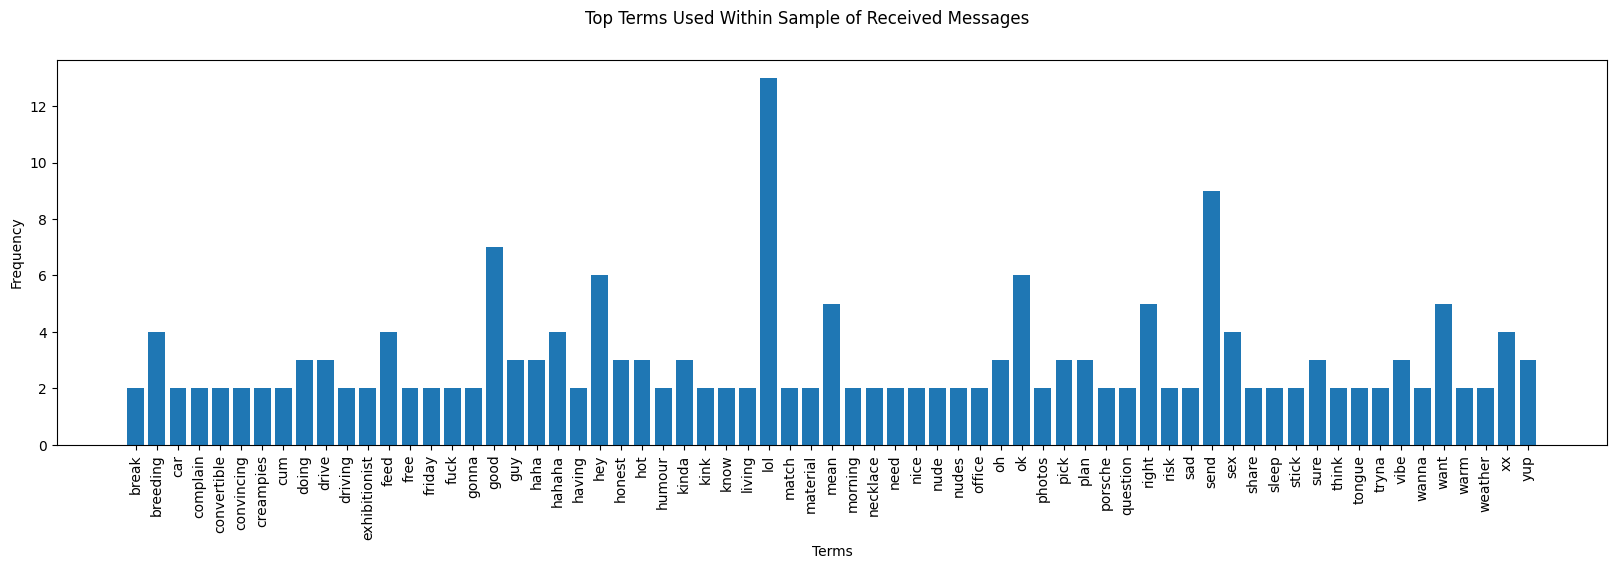

In [100]:
# might be easier to try to work with the Counter object than the sorted() list
counted_list
# type(counted_list)

for key, value in list(counted_list.items()):
    if value < 2:
        del counted_list[key]

counted_list        
        
temp2 = plt.figure(figsize=(20, 5)) 
temp = plt.xticks(rotation=90)

plt.suptitle("Top Terms Used Within Sample of Received Messages")
plt.xlabel("Terms")
plt.ylabel("Frequency")

plt.bar(counted_list.keys(), counted_list.values())